In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Load the data
data = pd.read_csv("C:/Users/91863/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data_attrition_yes = data[data['Attrition'] == 'Yes']

# Separate features and target variables
X = data_attrition_yes.drop(columns=['Attrition']) 
y_regression = data_attrition_yes['DailyRate']  
y_classification = data_attrition_yes['Attrition']  

# Identify categorical columns for preprocessing
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Preprocessing with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
    ],
    remainder='passthrough'
)

# Transform features
X_processed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_regression_train, y_regression_test, y_classification_train, y_classification_test = train_test_split(
    X_processed, y_regression, y_classification, test_size=0.2, random_state=42)

# Training models
regressor_model = RandomForestRegressor()
classifier_model = RandomForestClassifier()
regressor_model.fit(X_train, y_regression_train)
classifier_model.fit(X_train, y_classification_train)

# Making predictions
daily_rate_predictions = regressor_model.predict(X_test)
attrition_predictions = classifier_model.predict(X_test)

# Creating DataFrame for predictions
predictions_df = pd.DataFrame({'Predicted_DailyRate': daily_rate_predictions, 'Attrition': attrition_predictions})

# Save predictions to CSV file
predictions_df.to_csv('C:/Users/91863/Downloads/attrition_predictions.csv', index=False)



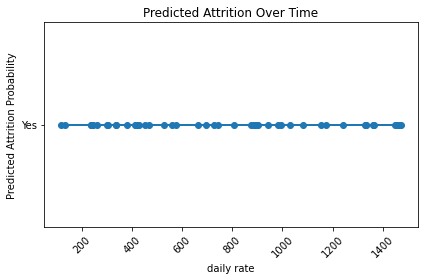

In [13]:
# Load predictions data
predictions_df = pd.read_csv('C:/Users/91863/Downloads/attrition_predictions.csv')  # Update path accordingly

# Assuming 'Date' column exists in your predictions DataFrame
# If 'Date' column doesn't exist, replace it with appropriate x-axis column
x_values = predictions_df['Predicted_DailyRate']  # Replace 'Date' with appropriate column name

# Assuming 'Predicted_Attrition' column contains the predicted values
# Replace it with the appropriate column name
y_values = predictions_df['Attrition']  

# Plotting the line chart
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('daily rate')  # Replace 'Date' with appropriate label
plt.ylabel('Predicted Attrition Probability')  # Replace with appropriate label
plt.title('Predicted Attrition Over Time')  # Replace with appropriate title

# Displaying the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [1]:
import os

print(os.getcwd())

C:\Users\91863
